In [ ]:
from google.colab import drive;
drive.mount('/content/drive')

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
test_dir="/content/drive/MyDrive/AI ML/WEEK 4/DevanagariHandwrittenDigitDataset/Test"
train_dir="/content/drive/MyDrive/AI ML/WEEK 4/DevanagariHandwrittenDigitDataset/Train"

In [4]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Adding a Gaussian noise to the images with noise factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


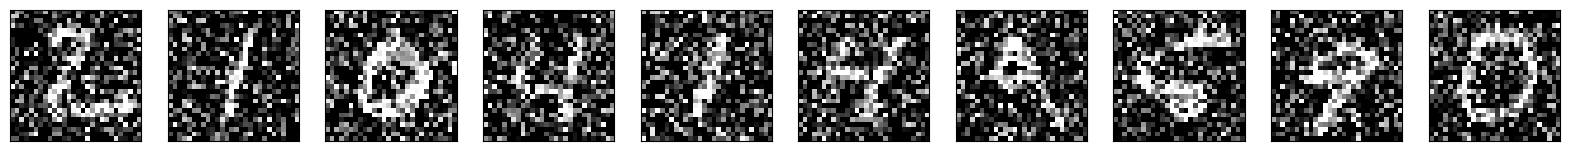

In [5]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

#Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

#Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compiling autoencoder model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 169s 352ms/step - loss: 0.2259 - val_loss: 0.1168
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 182s 312ms/step - loss: 0.1151 - val_loss: 0.1080
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 320ms/step - loss: 0.1083 - val_loss: 0.1044
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 316ms/step - loss: 0.1050 - val_loss: 0.1027
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 319ms/step - loss: 0.1031 - val_loss: 0.1008
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 317ms/step - loss: 0.1016 - val_loss: 0.1000
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 311ms/step - loss: 0.1004 - val_loss: 0.0990
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 208s 324ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 313ms/step - loss: 0.0987 - val_loss: 0.0977
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 313ms/step - loss: 0.0985 - val_loss: 0.0972
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 308ms/step - loss: 0.0978 - val_loss: 0.09

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


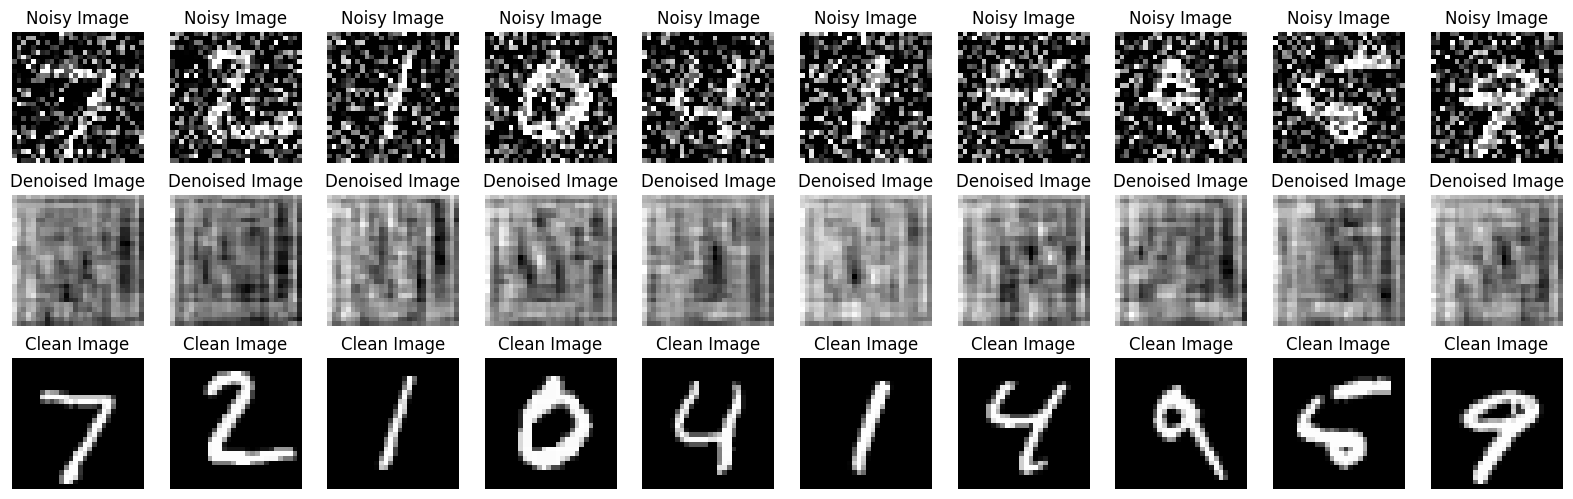

In [7]:
# Predict the denoised images from noisy test images
denoised_images = autoencoder.predict(x_test_noisy)

# Function to display images
def plot_images(noisy_images, denoised_images, clean_images, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Plot noisy images
        plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy Image")
        plt.axis('off')

        # Plot denoised images
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised Image")
        plt.axis('off')

        # Plot clean images
        plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(clean_images[i].reshape(28, 28), cmap='gray')
        plt.title("Clean Image")
        plt.axis('off')
    plt.show()

# Display the first 10 images
plot_images(x_test_noisy, denoised_images, x_test, n=10)